In [1]:
# Mount GDrive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

file_path = '/content/drive/MyDrive/EC ENGR 219 Large-Scale Data Mining: Models & Algorithms/Project 1/Project1-ClassificationDataset.csv'
df = pd.read_csv(file_path)

print(df.head())

# Print the number of rows and columns for checking
print(f"Number of rows: {df.shape[0]}, Number of columns: {df.shape[1]}")

                                           full_text  \
0  'Personalize Your NBA App Experience for the '...   
1  'Mike Will attends the Pre-GRAMMY Gala and GRA...   
2  'The Golden State Warriors are struggling to f...   
3  'On Nov. 28, the NBA and Nike will collaborate...   
4  'The NBA announced additions and innovations t...   

                                             summary  \
0  'Personalize Your NBA App Experience for the '...   
1  'Mike WiLL Made-It has secured a partnership w...   
2  'The Golden State Warriors are struggling to f...   
3  'On Nov. 28, the NBA and Nike will collaborate...   
4  'The NBA announced additions and innovations t...   

                                            keywords  \
0  ['original', 'content', 'live', 'slate', 'game...   
1  ['lead', 'espn', 'nbas', 'madeit', 'nba', 'lat...   
2  ['insider', 'york', 'thing', 'nbc', 'tag', 'nb...   
3  ['watch', 'telecast', 'ultimate', 'membership'...   
4  ['experience', 'bring', 'media', 'crennan',

Question 1

i) Overview: How many rows (samples) and columns (features) are present in the dataset?

Ans: 3476 rows, 8 columns

ii) Histograms: Plot 3 histograms on:
  
  a) The total number of alpha-numeric characters per
  data point (row) in the feature full text: i.e count on the x-axis and frequency on the y-axis (see below)
  
  b) The column leaf label – class on the x-axis (see below)
  
  c) The column root label – class on the x-axis (see below)

iii) Interpret Plots: Provide qualitative interpretations of the histograms

  Ans a) Distribution is heavily skewed towards lower counts from 0 to 4000 characters, with an indication that most articles have a short to medium length, possibly to attract viewership. There is a sharp decrease in frequency, with a lower right tail end beginning at 6000 characters, suggesting there are a few number of lengthy articles.

  Ans b) The distribution of child categories of the articles is almost uniform, suggesting that there is a reasonable balance of categories that will reduce the likelihood of model bias towards specific categories. This will help with prediction accuracy across the child categories for the classification model in this assignment.

  Ans c) The distribution of the two parent categories (i.e. sports, climate) are almost uniform, indicating a fairly equal spread of data points, similar to the leaf distribution in b). This will also help with prediction accuracy, encouraging the classification model to reduce bias towards a single parent category due to under-representation of data from another category.

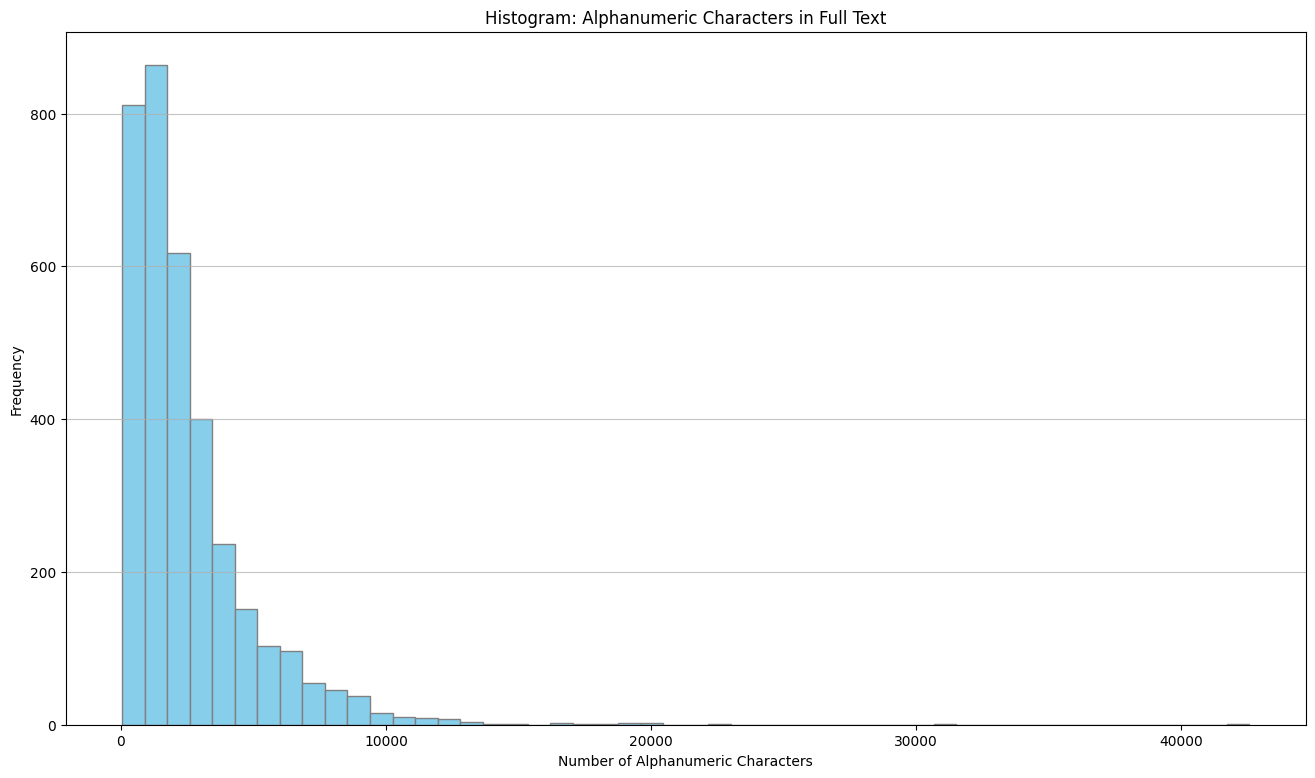

The total number of rows in DataFrame (sum of frequencies) is: 3476


In [3]:
import re
import matplotlib.pyplot as plt

def count_alphanumeric(text):
    if pd.isna(text):
        return 0
    return len(re.sub(r'[^a-zA-Z0-9]', '', str(text)))

df['alphanumeric_count'] = df['full_text'].apply(count_alphanumeric)

plt.figure(figsize=(16, 9))
plt.hist(df['alphanumeric_count'], bins=50, color='skyblue', edgecolor='gray')
plt.title('Histogram: Alphanumeric Characters in Full Text')
plt.xlabel('Number of Alphanumeric Characters')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

# Check
print(f"The total number of rows in DataFrame (sum of frequencies) is: {df['alphanumeric_count'].shape[0]}")

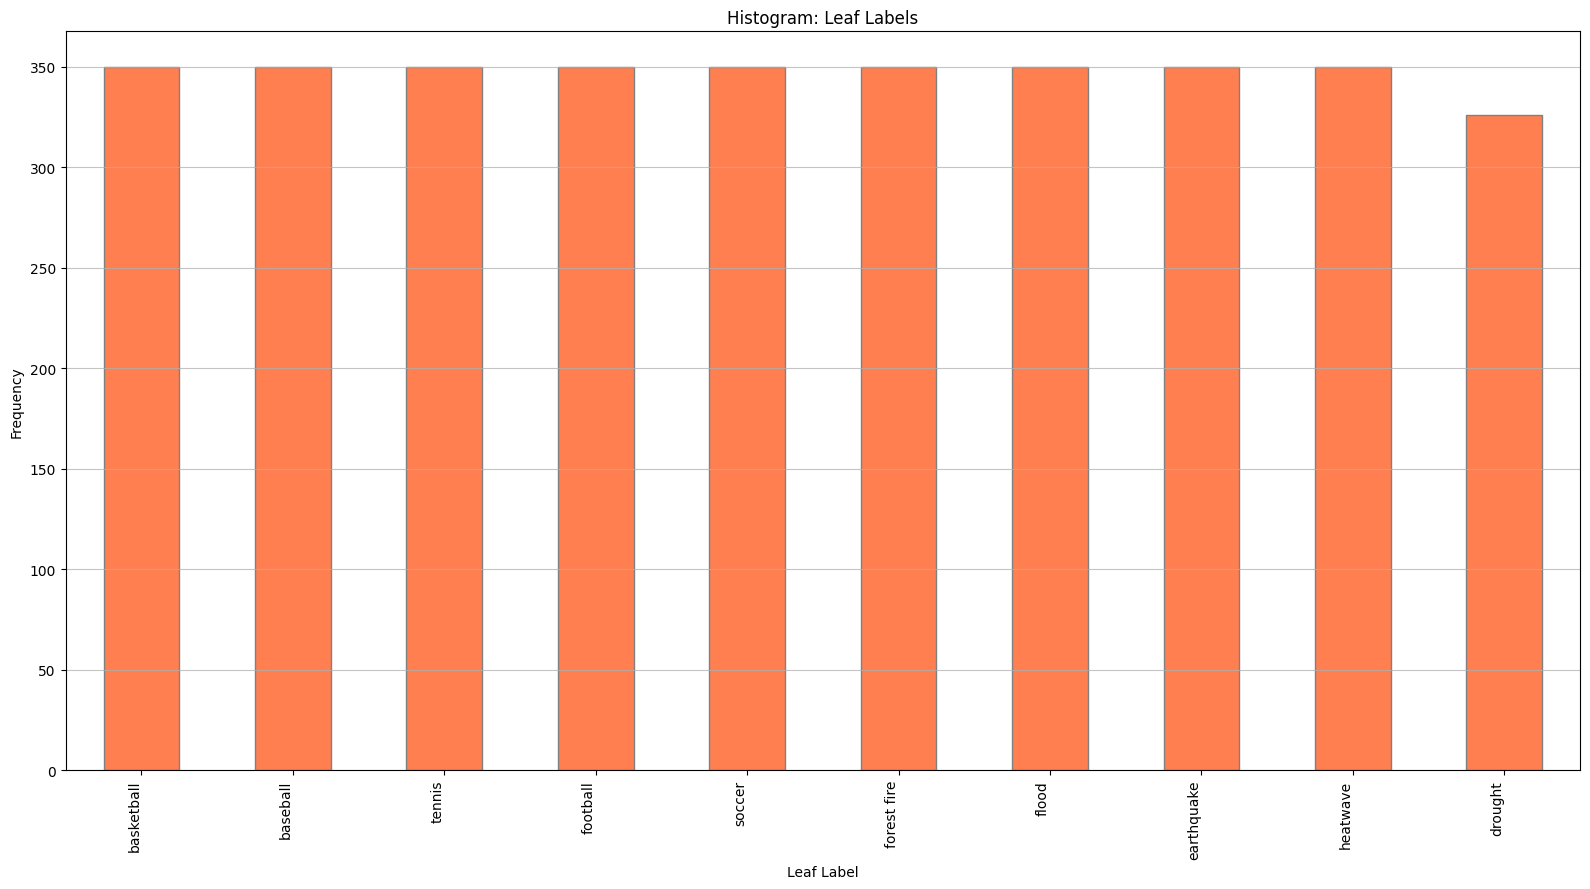

The total number of rows in DataFrame (sum of frequencies) is: 3476


In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 9))
df['leaf_label'].value_counts().plot(kind='bar', color='coral', edgecolor='gray')
plt.title('Histogram: Leaf Labels')
plt.xlabel('Leaf Label')
plt.ylabel('Frequency')
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.grid(axis='y', alpha=0.75)
plt.show()

# Check
print(f"The total number of rows in DataFrame (sum of frequencies) is: {df['leaf_label'].shape[0]}")

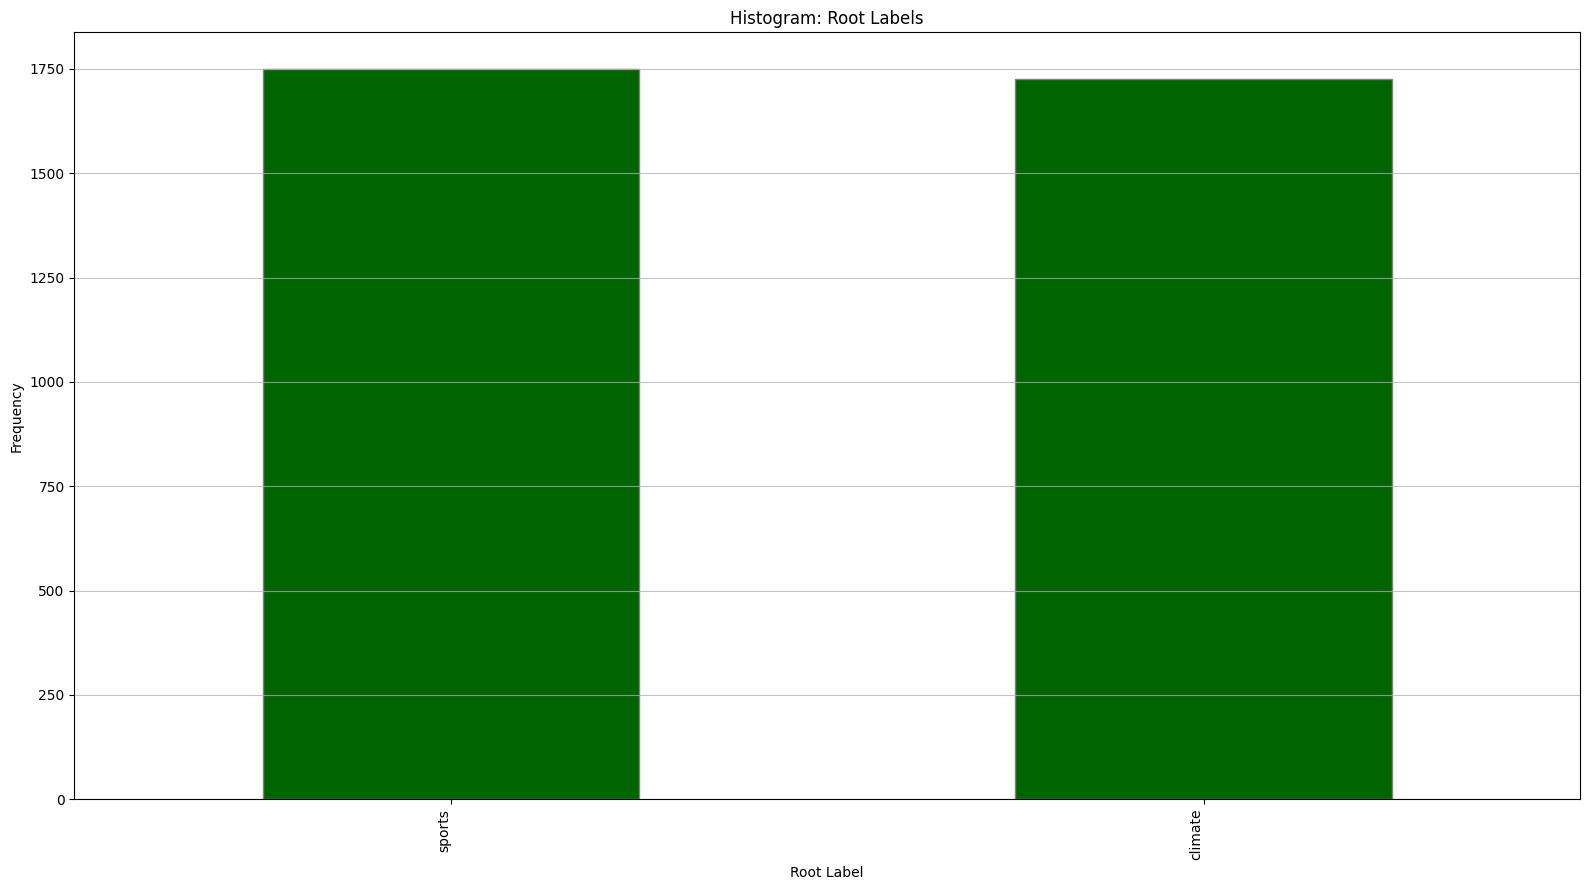

The total number of rows in DataFrame (sum of frequencies) is: 3476


In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 9))
df['root_label'].value_counts().plot(kind='bar', color='darkgreen', edgecolor='gray')
plt.title('Histogram: Root Labels')
plt.xlabel('Root Label')
plt.ylabel('Frequency')
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.grid(axis='y', alpha=0.75)
plt.show()

# Check
print(f"The total number of rows in DataFrame (sum of frequencies) is: {df['root_label'].shape[0]}")

In [6]:
import numpy as np
import random

np.random.seed(42)
random.seed(42)

In [7]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df[["full_text","root_label"]], test_size=0.2)

from sklearn.model_selection import train_test_split
train, test = train_test_split(
  df[["full_text", "root_label", "leaf_label"]],
  test_size=0.2
)

QUESTION 2: Report the number of training and testing samples.

Ans: Number of training samples: 2780, Number of testing samples: 696

In [8]:
print(f"Number of training samples: {train.shape[0]}, Number of testing samples: {test.shape[0]}")

Number of training samples: 2780, Number of testing samples: 696


NLP techniques to retrieve a word's base form

* Stemming: simple rules (or crude heuristic) to remove a word's ending (e.g. running -> runn); sacrifices accuracy for speed
* Lemmatization: leverages context & vocabulary to find a meaningful base word (e.g. running -> run); sacrifices speed for accuracy

In [9]:
# Helper code
import re
def clean(text):
  text = re.sub(r'^https?:\/\/.*[\r\n]*', '', text, flags=re.MULTILINE)
  texter = re.sub(r"<br />", " ", text)
  texter = re.sub(r"&quot;", "\"",texter)
  texter = re.sub('&#39;', "\"", texter)

  texter = re.sub('\n', " ", texter)
  texter = re.sub(' u '," you ", texter)
  texter = re.sub('`',"", texter)
  texter = re.sub(' +', ' ', texter)
  texter = re.sub(r"(!)\1+", r"!", texter)
  texter = re.sub(r"(\?)\1+", r"?", texter)
  texter = re.sub('&amp;', 'and', texter)
  texter = re.sub('\r', ' ',texter)
  clean = re.compile('<.*?>')
  texter = texter.encode('ascii', 'ignore').decode('ascii')
  texter = re.sub(clean, '', texter)
  if texter == "":
    texter = ""
  return texter

QUESTION 3: Use the following specs to extract features from the textual data:

• Before doing anything, please clean each data sample using the code block provided above. This function helps remove many but not all HTML artefacts from the crawler’s output.

• Use the “english” stopwords of the CountVectorizer

• Exclude terms that are numbers (e.g. “123”, “-45”, “6.7” etc.)

• Perform lemmatization with nltk.wordnet.WordNetLemmatizer and pos tag

• Use min df=3


The following functions in sklearn will be useful: CountVectorizer, TfidfTransformer, About Lemmatization and
for the daring, Pipeline.

In [10]:
train['full_text'] = train['full_text'].apply(clean)
test['full_text'] = test['full_text'].apply(clean)

print("Cleaned 'full_text' in training DataFrame:")
print(train.head())
print("\nCleaned 'full_text' in testing DataFrame:")
print(test.head())

Cleaned 'full_text' in training DataFrame:
                                              full_text root_label  leaf_label
1368  'On February 9th, 2025, the Super Bowl will be...     sports    football
2835  'OMAHA, Neb. (WOWT) - Health experts at the Un...    climate     drought
2499  'A magnitude-4.8 earthquake was reported in No...    climate  earthquake
1046  'Serena Williams is getting candid about her m...     sports      tennis
1374  'Leonard Fournette #28 of the Tampa Bay Buccan...     sports    football

Cleaned 'full_text' in testing DataFrame:
                                              full_text root_label  leaf_label
403   'The tradition continues in Western New York! ...     sports    baseball
2946  'Here's how much rain has fallen in Kansas Cit...    climate     drought
2435  'This is a carousel. Use Next and Previous but...    climate       flood
263   'It was another big year for former UConn star...     sports  basketball
1081  'CBS Essentials is created independentl

In [11]:
import nltk
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag, word_tokenize
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

# Term Frequency-Inverse Document Frequency Model (TF-IDF):
# Counts the number of times a word occurs in a document (the term frequency) but also scales
# the resulting count by the number of documents the word appears in (the document frequency)
# Interpretation: “What is the frequency of words in a document specific to that document and which differentiates it from other documents?"

# TF-IDF(d,t) = TF(t,d) × IDF(t)
# TF(d,t) represents the frequency of word (processed, lemmatized, otherwise filtered) t in document d
# IDF(t) = log [n / DF(t)] + 1, where n is the total number of documents, and df(t) is the number of documents that contain the word t

# Download required NLTK data
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('averaged_perceptron_tagger_eng')

lemmatizer = WordNetLemmatizer()

# Function that converts POS tag to WordNet format
def get_wordnet_pos(treebank_tag):
    """Convert treebank POS tags (more granular) to wordnet POS tags (less granular)"""
    if treebank_tag.startswith('J'):
        return 'a'  # adjective
    elif treebank_tag.startswith('V'):
        return 'v'  # verb
    elif treebank_tag.startswith('N'):
        return 'n'  # noun
    elif treebank_tag.startswith('R'):
        return 'r'  # adverb
    else:
        return 'n'  # default to noun

# Check token is not a number
def is_not_number(token):
    """Check token is not a number by using float function"""
    try:
        float(token)
        return False
    except ValueError:
        return True

# Tokenizer with lemmatization and POS tagging
def lemmatize_with_pos(text):
    """Tokenize, POS tag, and lemmatize text"""
    # Tokenize
    tokens = word_tokenize(text.lower())
    tokens = [token for token in tokens if is_not_number(token)]

    # POS tag
    pos_tags = pos_tag(tokens)

    # Lemmatize with POS tags
    lemmatized = [
        lemmatizer.lemmatize(word, get_wordnet_pos(pos))
        for word, pos in pos_tags
    ]

    return lemmatized

vectorizer = CountVectorizer(
    tokenizer=lemmatize_with_pos, # tokenize -> POS tag -> lemmatize
    stop_words='english',
    min_df=3, # keep words that appear in min. 3 documents
    token_pattern=None # disables the default regex pattern for tokenization
)
# Fit on training data and transform both train and test
X_train = vectorizer.fit_transform(train['full_text'])
X_test = vectorizer.transform(test['full_text'])

# TfidfTransformer (convert counts to TF-IDF)
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train)
X_test_tfidf = tfidf_transformer.transform(X_test)

print(f"Training TF-IDF matrix shape: {X_train_tfidf.shape}")
print(f"Testing TF-IDF matrix shape: {X_test_tfidf.shape}")
print(f"Vocabulary size: {len(vectorizer.vocabulary_)}")

# Show some vocabulary words for checking
print(f"\nFirst 20 words in vocabulary: {list(vectorizer.vocabulary_.keys())[:20]}")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.
/usr/local/lib/python3.12/dist-packages/sklearn/feature_extraction/text.py:402: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['far', 'make', 'u'] not in stop_words.
  warnings.warn(


Training TF-IDF matrix shape: (2780, 15007)
Testing TF-IDF matrix shape: (696, 15007)
Vocabulary size: 15007

First 20 words in vocabulary: ["'on", 'february', '9th', ',', 'super', 'bowl', 'hold', 'inside', 'caesar', 'superdome', '.', 'game', 'shine', 'spotlight', 'city', 'grow', 'problem', 'new', 'orleans', 'come']


Please answer the following questions:

1. What are the pros and cons of lemmatization versus stemming? How do these processes affect the dictionary size?

Ans:

Lemmatization
- Pros: higher accuracy at extracting meaningful base words (e.g. running -> run), as it uses vocabularly, context and morphological analysis (e.g. POS tagging)
- Cons: computationally expensive, as it requires POS tagging and resources such as WordNet database
- Effect on dictionary size: smaller dictionary, by converting inflected forms to their canonical versions

Stemming:
- Pros: Quick and computationally efficient, with simple rule logic
- Cons: Less accurate due its crude heuristic approach without context awareness (e.g. running -> runn)
- Effect on dictionary size: smaller dictionary

2. min df means minimum document frequency. How does varying min df change the TF-IDF matrix?

- Reduces vocabulary size (i.e. tightening of vocabulary inclusion criteria)
- Higher min df reduces sparsity of matrix, as less columns are zeroed out by rarer words (lower min df increases sparsity of matrix)
- Higher min df will result in lower average IDF values i.e. word's distinctness is reduced across document set; denominator in log factor increases due to increased documents for term t, where insightful common words are kept and nuanced rare words are removed (lower min df increases average IDF values)
- Higher min df reduces dimensionality, matrix sparsity and noise, resulting in faster computation and improved generalizability (and lower min df increases dimensionality, matrix sparsity and possibly noise, resulted in slower computation and reduced generalizability)

3. Should I remove stopwords before or after lemmatizing? Should I remove punctuations before or after lemmatizing? Should I remove numbers before or after lemmatizing? Hint: Recall that the full sentence is input into the Lemmatizer and the lemmatizer is tagging the position of every word based on the sentence structure.

- Stopwords and punctuation provide context that help with lemmatization process, therefore remove AFTERWARD
- Numbers do not help significantly with lemmatization process, but may assist in nuanced situations (e.g. dates, pronouns like 7UP), thus remove AFTERWARD

4. Report the shape of the TF-IDF-processed train and test matrices. The number of rows should match the results of Question 2. The number of columns should roughly be in the order of k×103. This dimension will vary depending on your exact method of cleaning and lemmatizing and that is okay.

Ans:

- Training TF-IDF matrix shape: (2780, 14861)
- Testing TF-IDF matrix shape: (696, 14861)
- Vocabulary size: 15007

QUESTION 4: Read the paper about GLoVE embeddings - found here: https://nlp.stanford.edu/pubs/glove.pdf

(a) Why are GLoVE embeddings trained on the ratio of co-occurrence probabilities rather than the probabilities themselves?

Ans: The probabilities themselves are small (e.g. 10⁻⁵ to 10⁻³ scale) and difficult for discrimination of relevance to target words, however when they are used as ratio of co-occurrence probabilities, it becomes much easier to distinguish their relevance to each target word. The paper mentions ratios close to 1, 'water' and 'fashion' show either relevance to both or neither target words (i.e. 'ice', 'steam'), however ratios higher or lower than 1 will show relevance to either 'ice' or 'steam' respectively.

(b) In the two sentences: “James is running in the park.” and “James is running for the presidency.”, would GLoVE embeddings return the same vector for the word running in both cases? Why or why not?

Ans: The same vector for 'running', as GloVe assigns a single, fixed vector embedding regardless of the context in which the word appears. This is because GLoVE learns from global co-occurrence statistics across the entire text corpus.

(c) What do you expect for the values of:
||GLoVE["left"] - GLoVE["right"]||2, ||GLoVE["wife"] - GLoVE["husband"]||2 and ||GLoVE["wife"] - GLoVE["orange"]||2 ? Compare these values.

Ans: 'wife' and 'orange' have least similarity in semantic meaning AND are not likely to appear together often, thus largest vector difference. 'left' and 'right' have more similarity in semantic meaning BUT are not expected to appear together often as they are antonyms, thus second largest vector difference. 'wife' and 'husband' have similarity in semantic meaning AND are expected to appear together often, thus smallest vector difference.

(d) Given a word, would you rather stem or lemmatize the word before mapping it to its GLoVE embedding?

Ans: Yes lemmatizing is preferred, as it is more likely to produce valid base words over stemming.

QUESTION 5: GLoVE → document embeddings. Our goal in this part is to convert each news article into a single fixed-dimensional vector embedding using pretrained GLoVE word vectors. Focus on embedding the full text field (you may optionally incorporate other columns such as keywords, but full text should be the primary input).

(a) Describe a feature construction pipeline that maps each document to a vector using GLoVE.
You must follow these rules:
• The final document embedding must have dimension at most the GLoVE word embedding dimension (e.g., ≤ 300 if using glove.6B.300d).
• You may not use TF–IDF scores or any corpus-level weighting scheme that requires access to the full dataset (beyond the provided train/test split).
• Your document embedding must be computed by aggregating word embeddings from the document (e.g., normalize word vectors, then average/sum; you may also consider simple heuristics such as ignoring stopwords or handling out-of-vocabulary tokens).

Ans:
1. Preprocessing: Apply lowercase to document, tokenize, and lemmatize on alphabetic tokens (WordNetLemmatizer is used to reduce words to base forms e.g. "running" -> "run", improving vocabulary coverage and reducing OOV rate)
2. Embedding lookup: After preprocessing, lemmatized words are looked up in the GLoVE vocabulary dictionary, whilst out-of-vocabulary tokens are skipped
3. Aggregation: Next, the embedding vector for these words are aggregated, and arithmetic mean is performed to yield a fixed 300-dimensional output


(b) Implement your pipeline and report:

(i) the shapes of the resulting train/test embedding
matrices

Ans: Train embedding matrix shape: (2780, 300), Test embedding matrix shape: (696, 300) [see below]

(ii) the out-of-vocabulary (OOV) rate of tokens under your chosen GLoVE
vocabulary

Ans: Train OOV rate: 0.86% (11768/1374657 tokens), Test OOV rate: 0.83% (2805/337355 tokens) [see below]

In [12]:
file_path = '/content/drive/MyDrive/EC ENGR 219 Large-Scale Data Mining: Models & Algorithms/Project 1/glove.6B.300d.txt'
embeddings_dict = {}
dimension_of_glove = 300
with open(file_path, 'r') as f: # if 'r' fails with unicode, please use 'rb'
  for line in f:
    values = line.split()
    word = values[0]
    vector = np.asarray(values[1:], "float32")
    embeddings_dict[word] = vector


In [13]:
import nltk
from nltk.stem import WordNetLemmatizer
from nltk import word_tokenize

lemmatizer = WordNetLemmatizer()

def doc_to_glove_vector(document, embeddings_dict):
    """ Convert a document to a single GLoVE vector, using pretrained GLoVE word vectors, and track OOV stats
    """
    # Preprocess
    tokens = word_tokenize(document.lower())
    lemmatized = [lemmatizer.lemmatize(token) for token in tokens if token.isalpha()]

    # Track OOV stats
    total_tokens = len(lemmatized)
    oov_count = 0

    # Get appended word vectors, and skip OOV words
    word_vectors = []
    for word in lemmatized:
        if word in embeddings_dict:
            word_vectors.append(embeddings_dict[word])
        else:
          oov_count+=1

    # Take the average of the aggregated document embeddings vector
    if len(word_vectors) > 0:
        document_vector = np.mean(word_vectors, axis=0)
    else:
        document_vector = np.zeros(300)

    return document_vector, total_tokens, oov_count

# Get train embedding matrix, and collect OOV stats
train_embedding_vectors = []
train_tot_tokens = 0
train_oov_tokens = 0

for doc in train['full_text']:
    doc_vec, total, oov = doc_to_glove_vector(doc, embeddings_dict)
    train_embedding_vectors.append(doc_vec)
    train_tot_tokens += total
    train_oov_tokens += oov

X_train_glove = np.array(train_embedding_vectors)
train_oov_rate = train_oov_tokens / train_tot_tokens

print(f"Train embedding matrix shape: {X_train_glove.shape}")
print(f"Train OOV rate: {train_oov_rate:.2%} ({train_oov_tokens}/{train_tot_tokens} tokens)")

test_embedding_vectors = []
test_tot_tokens = 0
test_oov_tokens = 0

for doc in test['full_text']:
    doc_vec, total, oov = doc_to_glove_vector(doc, embeddings_dict)
    test_embedding_vectors.append(doc_vec)
    test_tot_tokens += total
    test_oov_tokens += oov

X_test_glove = np.array(test_embedding_vectors)
test_oov_rate = test_oov_tokens / test_tot_tokens

print(f"Test shape: {X_test_glove.shape}")
print(f"Test OOV rate: {test_oov_rate:.2%} ({test_oov_tokens}/{test_tot_tokens} tokens)")

Train embedding matrix shape: (2780, 300)
Train OOV rate: 0.86% (11768/1374657 tokens)
Test shape: (696, 300)
Test OOV rate: 0.83% (2805/337355 tokens)


QUESTION 6: LLM Encoder Embeddings for News Articles (Document-level)
Choose a pretrained Transformer embedding model (e.g., sentence-transformers/all-MiniLM-L6-v2 or intfloat/e5-base-v2) and compute a vector embedding for each article using the full text field.

(a) Handling long documents. Transformer encoders have a maximum input length (often 512 tokens). Choose one strategy and justify it:
• truncate the document to the maximum length, or
• chunk the document into multiple windows and aggregate the chunk embeddings (e.g. average).
Report either (i) the fraction of documents that were truncated, or (ii) the average number of chunks per document.

Ans:
* Truncation of document was selected for its ease of implementation, computational efficiency and capture of key information.
* The proportion of truncated documents was (see below):

Truncation Stats:
Train: 76.01% (2113 of 2780 documents were truncated)
Test:  74.43% (518 of 696 documents were truncated)

(b) Deliverables. Report the shape of the resulting train and test embedding matrices, and the embedding dimension produced by your model.

Ans:

Train embedding shape: (2780, 384)
Test embedding shape: (696, 384)
Embedding dimension: 384

In [16]:
import torch
import numpy as np
from transformers import AutoTokenizer, AutoModel

MODEL_NAME = "sentence-transformers/all-MiniLM-L6-v2"
MAX_LEN = 256
BATCH_SIZE = 64

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load the model
tok = AutoTokenizer.from_pretrained(MODEL_NAME)
enc = AutoModel.from_pretrained(MODEL_NAME).to(device)
enc.eval()

@torch.no_grad()
def encode_texts(texts):
    """
    Encode texts using transformer model with mean pooling
    texts: list[str]
    returns: torch.Tensor [N, hidden_dim] on CPU
    """
    all_vecs = []
    for i in range(0, len(texts), BATCH_SIZE):
        batch = texts[i:i+BATCH_SIZE]
        inputs = tok(
            batch,
            truncation=True,
            max_length=MAX_LEN,
            padding=True,
            return_tensors="pt"
        )
        inputs = {k: v.to(device) for k, v in inputs.items()}
        out = enc(**inputs)  # out.last_hidden_state: [B, L, H]

        # mean pooling (mask padding)
        mask = inputs["attention_mask"].unsqueeze(-1).type_as(out.last_hidden_state)
        pooled = (out.last_hidden_state * mask).sum(dim=1) / mask.sum(dim=1).clamp(min=1e-6)

        all_vecs.append(pooled.cpu())

    return torch.cat(all_vecs, dim=0)

# Get stats of truncating documents
def calc_truncation_rate(docs, tokenizer, max_length):
    """ Calculate what proportion of documents were truncated """
    running_truncated_count = 0
    total_count = len(docs)

    for doc in docs:
        tokens = tokenizer.encode(doc, add_special_tokens=True)
        if len(tokens) > max_length:
            running_truncated_count += 1

    truncation_rate = running_truncated_count / total_count
    return truncation_rate, running_truncated_count, total_count


# Encode training data
X_train_transformer = encode_texts(train['full_text'].tolist())
X_train_transformer = X_train_transformer.numpy()

# Encode test data
X_test_transformer = encode_texts(test['full_text'].tolist())
X_test_transformer = X_test_transformer.numpy()

# Compute truncation stats
train_trunc_rate, train_trunc_count, train_total = calc_truncation_rate(
    train['full_text'].tolist(), tok, MAX_LEN
)
test_trunc_rate, test_trunc_count, test_total = calc_truncation_rate(
    test['full_text'].tolist(), tok, MAX_LEN
)


print(f"Train embedding shape: {X_train_transformer.shape}")
print(f"Test embedding shape: {X_test_transformer.shape}")
print(f"Embedding Dimension: {X_train_transformer.shape[1]}")

print(f"\nTruncation Stats:")
print(f"Train: {train_trunc_rate:.2%} ({train_trunc_count} of {train_total} documents were truncated)")
print(f"Test:  {test_trunc_rate:.2%} ({test_trunc_count} of {test_total} documents were truncated)")

Token indices sequence length is longer than the specified maximum sequence length for this model (690 > 512). Running this sequence through the model will result in indexing errors


Train embedding shape: (2780, 384)
Test embedding shape: (696, 384)
Embedding Dimension: 384

Truncation Stats:
Train: 76.01% (2113 of 2780 documents were truncated)
Test:  74.43% (518 of 696 documents were truncated)
